In [14]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sc

In [15]:
def Lorentzian(x, A, B, C, D):
    return A*(B**2)/( np.pi*((x-C)**2 + (B**2)) ) + D

In [440]:
DataFrame1 = pd.read_excel(io = "rayosx_data1.xlsx", sheet_name = "Actividad 1", skiprows=1)
DataFrame2 = pd.read_excel(io = "rayosx_data1.xlsx", sheet_name = "Actividad 2", skiprows=2)
DataFrame31 = pd.read_excel(io = "rayosx_data1.xlsx", sheet_name = "Actividad 3.1", skiprows=1)
DataFrame32 = pd.read_excel(io = "rayosx_data1.xlsx", sheet_name = "Actividad 3.2", skiprows=1)
DataFrame4 = pd.read_excel(io = "rayosx_data1.xlsx", sheet_name = "Actividad 4", skiprows=1)

# Calibración

In [208]:
calibre = 22.6 - 20.5
calibre

2.1000000000000014

In [417]:
cu_theta = DataFrame1["theta/°"].to_numpy() + calibre
cu_intensidad = DataFrame1["R(35kV)/Imp/s"].to_numpy() 

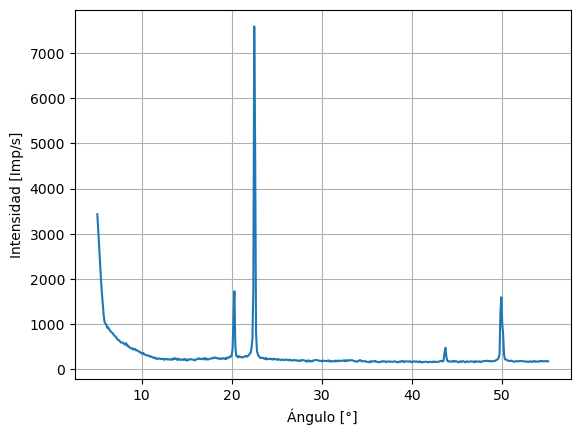

In [418]:
plt.plot(cu_theta, cu_intensidad)
plt.ylabel("Intensidad [Imp/s]")
plt.xlabel("Ángulo [°]")
plt.grid(True)

# Actividad 1

In [419]:
d = 2.014 #Armstrong
fase_values = np.linspace(-3, 3, 1000)
best_fase = None
min_error = float('inf')

best_orden1x, best_orden1y = [], []
best_orden2x, best_orden2y = [], []

err_orden1x, err_orden1x = [], []

for fase in fase_values:
    orden1x, orden1y = [], []
    orden2x, orden2y = [], []
    
    for i in range(len(cu_theta)):
        if 18 <= cu_theta[i] <= 25:
            orden1x.append(2 * d * np.sin((cu_theta[i] - fase) * np.pi / 180))
            orden1y.append(cu_intensidad[i])
        
        elif 41 <= cu_theta[i] <= 55:
            orden2x.append(d * np.sin((cu_theta[i] - fase) * np.pi / 180))
            orden2y.append(cu_intensidad[i])

    error = sum((np.interp(orden1x, orden2x, orden2y, left=0, right=0) - orden1y) ** 2)
    
    if error < min_error:
        min_error = error
        best_fase = fase
        best_orden1x, best_orden1y = orden1x, orden1y
        best_orden2x, best_orden2y = orden2x, orden2y

best_fase

0.039039039039038936

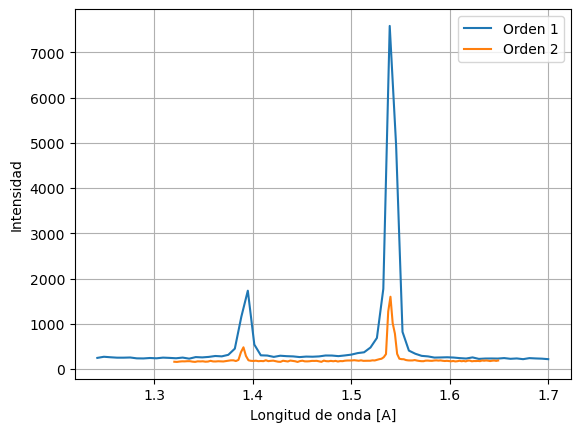

In [420]:
plt.plot(best_orden1x, best_orden1y, label="Orden 1")
plt.plot(best_orden2x, best_orden2y, label="Orden 2")
plt.legend()
plt.xlabel("Longitud de onda [A]")
plt.ylabel("Intensidad")
plt.grid()
plt.show()

In [421]:
orden1x_1, orden1y_1 = [], []
orden1x_2, orden1y_2 = [], []

orden2x_1, orden2y_1 = [], []
orden2x_2, orden2y_2 = [], []


for i in range(len(best_orden1x)):
    if 1.35 <= best_orden1x[i] <= 1.45:
        
        orden1x_1.append(best_orden1x[i])
        orden1y_1.append(best_orden1y[i])
        
    if 1.47 <= best_orden1x[i] < 1.6:
        
        orden1x_2.append(best_orden1x[i])
        orden1y_2.append(best_orden1y[i])
        
for i in range(len(best_orden2x)):
    if 1.33 <= best_orden2x[i] < 1.45:
        
        orden2x_1.append(best_orden2x[i])
        orden2y_1.append(best_orden2y[i])
        
    if 1.45 <= best_orden2x[i] < 1.65:

        orden2x_2.append(best_orden2x[i])
        orden2y_2.append(best_orden2y[i])

## Ajuste Lorentziano

In [282]:
params1, pcov1 = sc.optimize.curve_fit(Lorentzian,orden1x_1,orden1y_1)
inc1 = np.sqrt(np.diag(pcov1))
params1, inc1

(array([7.36220690e+03, 3.25446013e-03, 1.39239954e+00, 2.50700193e+02]),
 array([5.75139487e+02, 2.61265516e-04, 7.78262514e-05, 7.56956852e+00]))

In [283]:
params2, pcov2 = sc.optimize.curve_fit(Lorentzian,orden1x_2,orden1y_2)
inc2 = np.sqrt(np.diag(pcov2))
params2, inc2

(array([ 3.87162860e+04, -3.10299439e-03,  1.54144074e+00,  2.01484438e+02]),
 array([4.19089911e+03, 3.27461430e-04, 9.06342683e-05, 3.93397811e+01]))

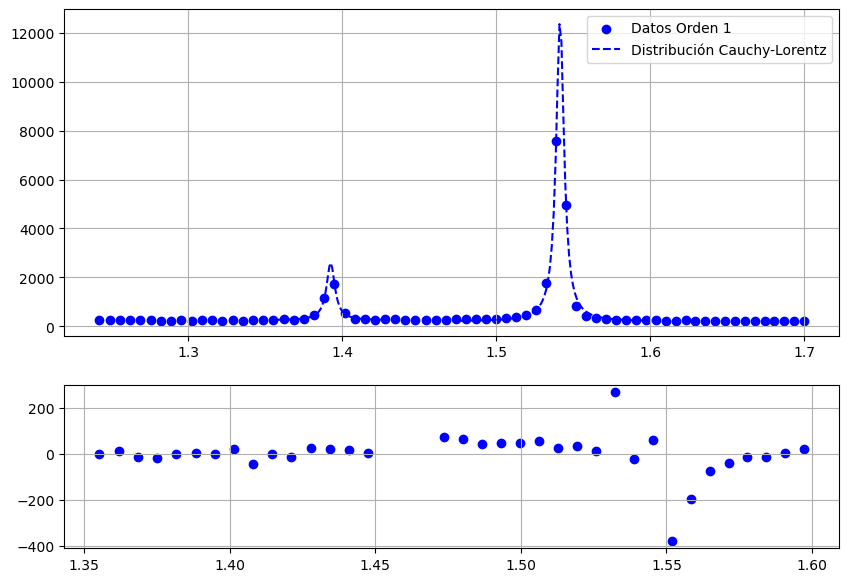

In [295]:
figure, axis = plt.subplots(2, 1, figsize = (10, 7), gridspec_kw={'height_ratios': [2, 1]})

plotx1 = np.linspace(orden1x_1[0],orden1x_1[-1],100)
plotx2 = np.linspace(orden1x_2[0],orden1x_2[-1],100)

axis[0].scatter(best_orden1x, best_orden1y, color = "#0000ff", label="Datos Orden 1")

axis[0].plot(plotx1, Lorentzian(plotx1,*params1), color = "#0000ff", label="Distribución Cauchy-Lorentz", linestyle="--")
axis[0].plot(plotx2, Lorentzian(plotx2,*params2), color = "#0000ff", linestyle="--")

axis[0].legend()
axis[0].grid()

residuals11 = orden1y_1 - Lorentzian(orden1x_1, *params1)
residuals12 = orden1y_2 - Lorentzian(orden1x_2, *params2)

axis[1].scatter(orden1x_1,residuals11, color = "#0000ff")
axis[1].scatter(orden1x_2,residuals12, color = "#0000ff")
axis[1].grid()

In [285]:
params3, pcov3 = sc.optimize.curve_fit(Lorentzian,orden2x_1,orden2y_1)
inc3 = np.sqrt(np.diag(pcov3))
params3, inc3

(array([1.11018048e+03, 1.99869184e-03, 1.38974395e+00, 1.69009669e+02]),
 array([5.60610542e+01, 1.46338734e-04, 9.01979171e-05, 1.72524067e+00]))

In [286]:
params4, pcov4 = sc.optimize.curve_fit(Lorentzian,orden2x_2,orden2y_2)
inc4 = np.sqrt(np.diag(pcov4))
params4, inc4

(array([4.68079293e+03, 2.73531136e-03, 1.53956551e+00, 1.68902099e+02]),
 array([1.41159717e+02, 1.19524576e-04, 9.47420728e-05, 5.34328618e+00]))

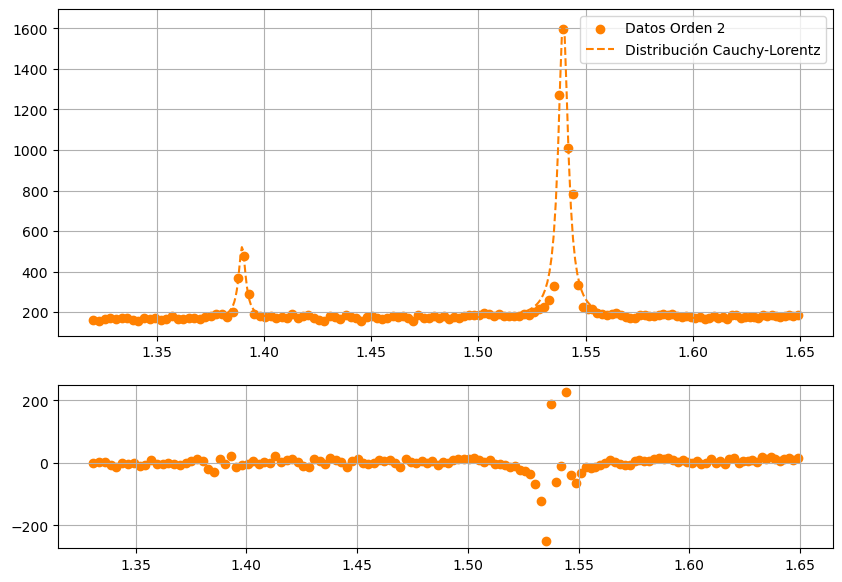

In [294]:
figure, axis = plt.subplots(2, 1, figsize = (10, 7), gridspec_kw={'height_ratios': [2, 1]})

plotx12 = np.linspace(orden2x_1[0],orden2x_1[-1],200)
plotx22 = np.linspace(orden2x_2[0],orden2x_2[-1],200)

axis[0].scatter(best_orden2x, best_orden2y, color = "#ff8000", label="Datos Orden 2")

axis[0].plot(plotx12, Lorentzian(plotx12,*params3), color = "#ff8000", label="Distribución Cauchy-Lorentz", linestyle="--")
axis[0].plot(plotx22, Lorentzian(plotx22,*params4), color = "#ff8000", linestyle="--")

axis[0].legend()
axis[0].grid()

residuals21 = orden2y_1 - Lorentzian(orden2x_1, *params3)
residuals22 = orden2y_2 - Lorentzian(orden2x_2, *params4)

axis[1].scatter(orden2x_1,residuals21, color = "#ff8000")
axis[1].scatter(orden2x_2,residuals22, color = "#ff8000")
axis[1].grid()

## Perfil Voigt

In [409]:
def Gauss(x, y0, a, x0, sigma):
    return y0 + a*np.exp(-((x - x0)**2)/(2*(sigma**2)))

def Voigt(x, amplitude, center, sigma, gamma):
    z = ((x - center) + 1j*gamma)/(sigma*np.sqrt(2))
    v = amplitude*sc.special.wofz(z).real/(sigma*np.sqrt(2*np.pi))
    return v

In [423]:
params5, pcov5 = sc.optimize.curve_fit(Voigt,orden2x_1,orden2y_1,maxfev = 10000)
inc5 = np.sqrt(np.diag(pcov5))
params5, inc5

C:\Users\Acer\AppData\Local\Temp\ipykernel_23036\2375520256.py:6: RuntimeWarning: overflow encountered in multiply
  v = amplitude*sc.special.wofz(z).real/(sigma*np.sqrt(2*np.pi))
C:\Users\Acer\AppData\Local\Temp\ipykernel_23036\2375520256.py:6: RuntimeWarning: overflow encountered in divide
  v = amplitude*sc.special.wofz(z).real/(sigma*np.sqrt(2*np.pi))


(array([5.48217364e+01, 1.39127870e+00, 2.36444307e-05, 8.05473037e-02]),
 array([3.48440175e+01, 5.60393932e-03, 7.99803893e+01, 1.09172421e-01]))

In [343]:
params6, pcov6 = sc.optimize.curve_fit(Voigt,orden1x_2,orden1y_2,maxfev = 10000)
inc6 = np.sqrt(np.diag(pcov6))
params6, inc6

(array([1.23205495e+02, 1.54109142e+00, 1.64710919e-03, 3.73073265e-03]),
 array([6.98343289e+00, 3.20987475e-04, 1.57337927e-03, 6.38772815e-04]))

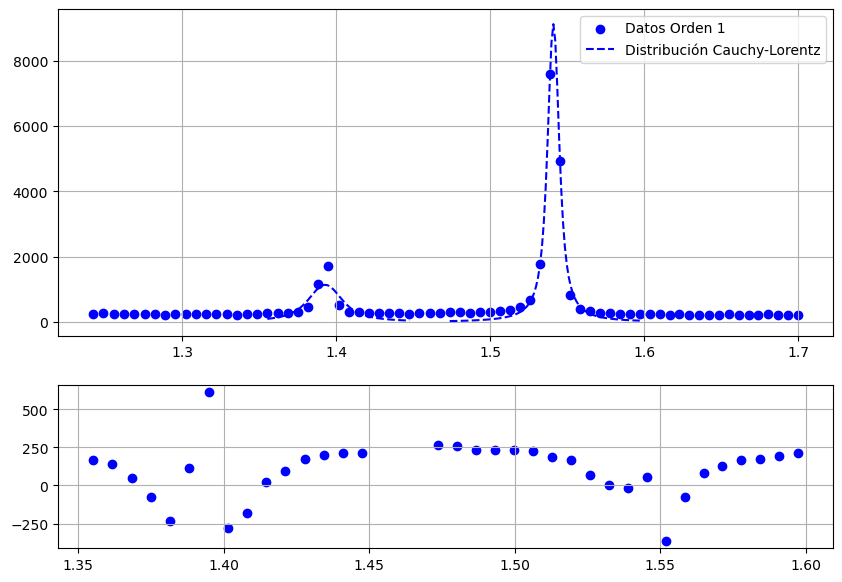

In [344]:
figure, axis = plt.subplots(2, 1, figsize = (10, 7), gridspec_kw={'height_ratios': [2, 1]})

plotx1 = np.linspace(orden1x_1[0],orden1x_1[-1],100)
plotx2 = np.linspace(orden1x_2[0],orden1x_2[-1],100)

axis[0].scatter(best_orden1x, best_orden1y, color = "#0000ff", label="Datos Orden 1")

axis[0].plot(plotx1, Voigt(plotx1,*params5), color = "#0000ff", label="Distribución Cauchy-Lorentz", linestyle="--")
axis[0].plot(plotx2, Voigt(plotx2,*params6), color = "#0000ff", linestyle="--")

axis[0].legend()
axis[0].grid()

residuals11 = orden1y_1 - Voigt(orden1x_1, *params5)
residuals12 = orden1y_2 - Voigt(orden1x_2, *params6)

axis[1].scatter(orden1x_1,residuals11, color = "#0000ff")
axis[1].scatter(orden1x_2,residuals12, color = "#0000ff")
axis[1].grid()

In [407]:
pre_params, pre_pcov = sc.optimize.curve_fit(Gauss,orden1x_1,orden1y_1,maxfev = 10000)
pre_params, np.sqrt(np.diag(pre_pcov))

(array([ 2.89621656e+02,  1.54904645e+03,  1.39306300e+00, -4.51678910e-03]),
 array([1.01452861e+01, 4.03972084e+01, 1.32939064e-04, 1.47653976e-04]))

In [408]:
sc.optimize.curve_fit(Voigt,orden1x_1,orden1y_1,maxfev = 1000, p0=(0,pre_params[1],pre_params[3],pre_params[2]))

(array([ 0.00000000e+00,  1.54904645e+03, -4.51678910e-03,  1.39306300e+00]),
 array([[inf, inf, inf, inf],
        [inf, inf, inf, inf],
        [inf, inf, inf, inf],
        [inf, inf, inf, inf]]))

In [398]:
params7, pcov7 = sc.optimize.curve_fit(Voigt,orden2x_1,orden2y_1,maxfev = 10000)
inc7 = np.sqrt(np.diag(pcov7))
params7, inc7

C:\Users\Acer\AppData\Local\Temp\ipykernel_23036\2375520256.py:6: RuntimeWarning: overflow encountered in multiply
  v = amplitude*sc.special.wofz(z).real/(sigma*np.sqrt(2*np.pi))
C:\Users\Acer\AppData\Local\Temp\ipykernel_23036\2375520256.py:6: RuntimeWarning: overflow encountered in divide
  v = amplitude*sc.special.wofz(z).real/(sigma*np.sqrt(2*np.pi))


(array([5.48217364e+01, 1.39127870e+00, 2.36444307e-05, 8.05473037e-02]),
 array([3.48440175e+01, 5.60393932e-03, 7.99803893e+01, 1.09172421e-01]))

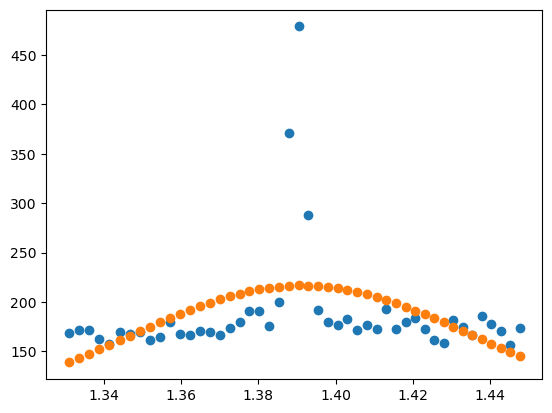

In [394]:
plt.scatter(orden2x_1,orden2y_1)
plt.scatter(orden2x_1,Voigt(orden2x_1,*params7))

In [346]:
params8, pcov8 = sc.optimize.curve_fit(Voigt,orden2x_2,orden2y_2,maxfev = 1000)
inc8 = np.sqrt(np.diag(pcov8))
params8, inc8

(array([2.17642565e+00, 1.58555692e+00, 4.66906790e-08, 2.04245172e-01]),
 array([190.11849915,   6.86454823,   6.31228785,  19.49517545]))

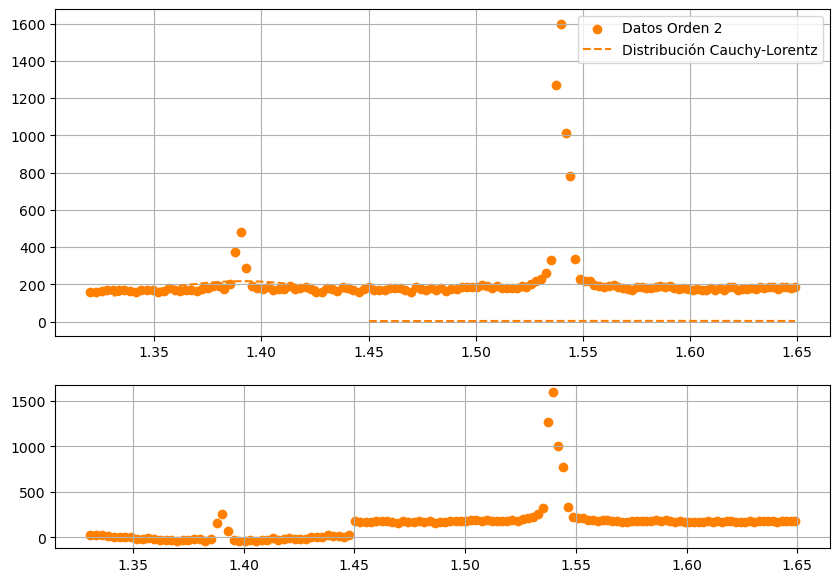

In [347]:
figure, axis = plt.subplots(2, 1, figsize = (10, 7), gridspec_kw={'height_ratios': [2, 1]})

plotx12 = np.linspace(orden2x_1[0],orden2x_1[-1],100)
plotx22 = np.linspace(orden2x_2[0],orden2x_2[-1],100)

axis[0].scatter(best_orden2x, best_orden2y, color = "#ff8000", label="Datos Orden 2")

axis[0].plot(plotx12, Voigt(plotx12,*params7), color = "#ff8000", label="Distribución Cauchy-Lorentz", linestyle="--")
axis[0].plot(plotx22, Voigt(plotx22,*params8), color = "#ff8000", linestyle="--")

axis[0].legend()
axis[0].grid()

residuals21 = orden2y_1 - Voigt(orden2x_1, *params7)
residuals22 = orden2y_2 - Voigt(orden2x_2, *params8)

axis[1].scatter(orden2x_1,residuals21, color = "#ff8000")
axis[1].scatter(orden2x_2,residuals22, color = "#ff8000")
axis[1].grid()

# Actividad 2

In [443]:
def longitud_onda(ang_array,d,fase):
    new_array = []
    for i in range(len(ang_array)):
        new_array.append(2 * d * np.sin((ang_array[i] - fase) * np.pi / 180))
    return np.array(new_array)

In [446]:
act2_ang = DataFrame2["theta/°"].to_numpy()[0:9]
act2_long = longitud_onda(act2_ang,d,best_fase)

act2_sin_material = DataFrame2["R(30kV)/Imp/s"].to_numpy()[0:9]

act2_Zn_0025 = DataFrame2["R(30kV)/Imp/s.1"].to_numpy()[0:9]
act2_Zn_005 = DataFrame2["R(30kV)/Imp/s.2"].to_numpy()[0:9]
act2_Zn_0075 = DataFrame2["R(30kV)/Imp/s.3"].to_numpy()[0:9]
act2_Zn_01 = DataFrame2["R(30kV)/Imp/s.4"].to_numpy()[0:9]

act2_Al_002 = DataFrame2["R(30kV)/Imp/s.5"].to_numpy()[0:9]
act2_Al_004 = DataFrame2["R(30kV)/Imp/s.6"].to_numpy()[0:9]
act2_Al_006 = DataFrame2["R(30kV)/Imp/s.7"].to_numpy()[0:9]
act2_Al_008 = DataFrame2["R(30kV)/Imp/s.8"].to_numpy()[0:9]
act2_Al_01 = DataFrame2["R(30kV)/Imp/s.9"].to_numpy()[0:9]

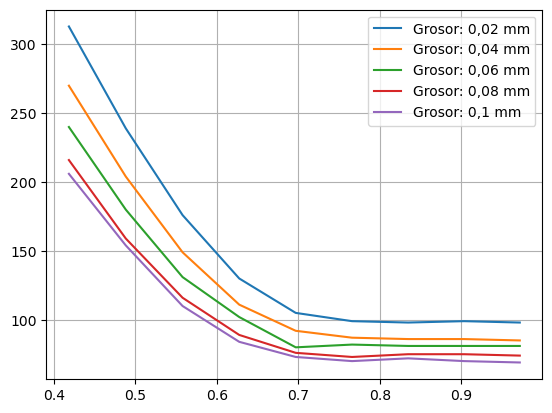

In [447]:
plt.plot(act2_long,act2_Al_002,label="Grosor: 0,02 mm")
plt.plot(act2_long,act2_Al_004,label="Grosor: 0,04 mm")
plt.plot(act2_long,act2_Al_006,label="Grosor: 0,06 mm")
plt.plot(act2_long,act2_Al_008,label="Grosor: 0,08 mm")
plt.plot(act2_long,act2_Al_01,label="Grosor: 0,1 mm")
plt.legend()
plt.grid()

In [448]:
grosor = np.array([0.02, 0.04, 0.06, 0.08, 0.1])/1000

# Actividad 3

In [214]:
act3_ang = DataFrame3["theta/°"].to_numpy() + calibre